<h1>Import Necessary Liabraries</h1>

In [1]:
import os 
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder  

<h1>One Hot Encode the Target Classes</h1>

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]]) 
# '0' - Tumor
# '1' - No Tumor 

OneHotEncoder()

<h1>Create lists for storing data --</h1>
 <h5>1. data list for storing image data in numpy array.</h5>
 <h5>. paths list for storing paths of all images.</h5>
 <h5>3. result list for storing one hot encoded form of target class whether normal or tumor.</h5>

In [3]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r,d,f in os.walk(r'../brain tumor/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())


In [4]:
# This cell updates result list for images without tumor
paths = []

for r,d,f in os.walk(r'../brain tumor/brain_tumor_dataset/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())


<h1>Convert data into numpy form</h1>

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

<h1>Convert result array </h1>

In [6]:
result = np.array(result)
result = result.reshape(139,2)

<h1>Split the data for training and testing</h1>

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2,shuffle=True, random_state=0)

<h1>Build the Model</h1>

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2,2), input_shape=(128,128,3), padding='Same'))
model.add(Conv2D(32, kernel_size=(2,2), activation = 'relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2,2), activation = 'relu', padding='Same'))
model.add(Conv2D(64, kernel_size=(2,2), activation = 'relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [10]:
y_train.shape

(111, 2)

<h1>Fit the data to the Model</h1>

In [12]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 60, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/30
2/2 [==============================] - 3s 1s/step - loss: 6.9284e-05 - val_loss: 8.4456
Epoch 2/30
2/2 [==============================] - 3s 1s/step - loss: 9.5981e-06 - val_loss: 8.4174
Epoch 3/30
2/2 [==============================] - 3s 1s/step - loss: 3.2863e-07 - val_loss: 8.3942
Epoch 4/30
2/2 [==============================] - 3s 1s/step - loss: 2.1479e-09 - val_loss: 8.3749
Epoch 5/30
2/2 [==============================] - 3s 1s/step - loss: 0.0611 - val_loss: 8.3130
Epoch 6/30
2/2 [==============================] - 3s 2s/step - loss: 6.4015e-04 - val_loss: 8.2241
Epoch 7/30
2/2 [==============================] - 3s 2s/step - loss: 3.2219e-09 - val_loss: 8.1550
Epoch 8/30
2/2 [==============================] - 4s 2s/step - loss: 0.0161 - val_loss: 8.0697
Epoch 9/30
2/2 [==============================] - 3s 2s/step - loss: 0.0585 - val_loss: 7.9981
Epoch 10/30
2/2 [==============================] - 3s 2s/step - loss: 1.7613e-07 - val_loss: 7.9612
Epoch 11/30
2/2 [====

<h1>Plot the losses</h1>

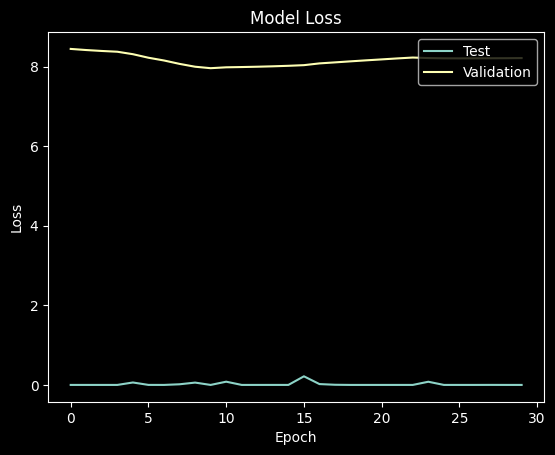

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test','Validation'], loc='upper right')
plt.show()